In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [84]:
df = pd.read_csv('house.csv')

In [85]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
housing_type      0
bedroom           0
bathroom          0
guest_toilet      0
parking_space     0
district          0
location          0
rent_per_annum    0
dtype: int64


In [86]:
df.describe()

,bedroom,bathroom,guest_toilet,parking_space,rent_per_annum
count,30738.000000,30738.000000,30738.000000,30738.000000,3.073800e+04
mean,2.291073,2.342540,0.641128,1.036144,3.800214e+06
std,0.950661,0.982761,0.653990,1.229297,5.568613e+06
min,1.000000,0.000000,0.000000,0.000000,2.000000e+04
25%,2.000000,2.000000,0.000000,0.000000,1.400000e+06
50%,2.000000,2.000000,1.000000,0.000000,2.696032e+06
75%,3.000000,3.000000,1.000000,2.000000,4.500000e+06
max,6.000000,6.000000,3.000000,5.000000,4.800000e+08


In [87]:
numeric_columns = ['bedroom', 'bathroom', 'parking_space', 'rent_per_annum']
basic_statistics = df[numeric_columns].describe()
print("\nBasic Statistics:")
print(basic_statistics)


Basic Statistics:
            bedroom      bathroom  parking_space  rent_per_annum
count  30738.000000  30738.000000   30738.000000    3.073800e+04
mean       2.291073      2.342540       1.036144    3.800214e+06
std        0.950661      0.982761       1.229297    5.568613e+06
min        1.000000      0.000000       0.000000    2.000000e+04
25%        2.000000      2.000000       0.000000    1.400000e+06
50%        2.000000      2.000000       0.000000    2.696032e+06
75%        3.000000      3.000000       2.000000    4.500000e+06
max        6.000000      6.000000       5.000000    4.800000e+08


In [88]:
df.head()

,housing_type,bedroom,bathroom,guest_toilet,parking_space,district,location,rent_per_annum
0,Selfcon,1,0,0,0,Oshodi-Mafoluku,Oshodi-Mafoluku,84000
1,Flat/Apartment,3,3,1,2,Lekki,Lekki,85000
2,Mini Flat,1,1,0,1,Ikorodu,Ikorodu,90000
3,Flat/Apartment,2,2,0,2,Ikoyi,Ikoyi,90000
4,Mini Flat,1,1,0,2,Ikorodu,Ikorodu,100000


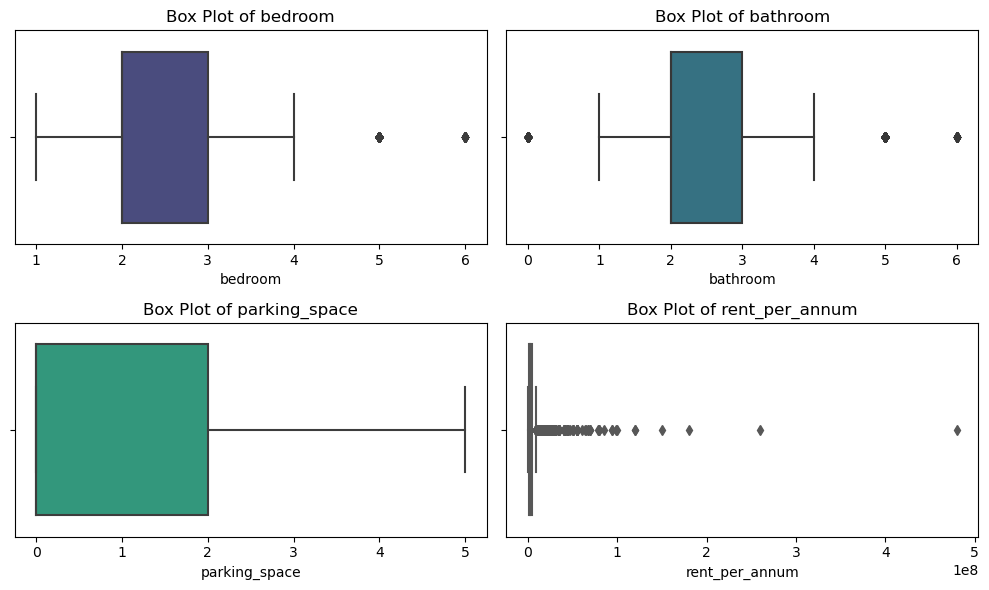

In [89]:
colors = sns.color_palette("viridis", len(numeric_columns))

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    
    sns.boxplot(x=df[column], color=colors[i-1])
    
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

### Removing Outliers in Rent Per Annum.

In [92]:

def remove_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_no_outliers

df = remove_outliers_iqr(df, 'rent_per_annum',  threshold=1.5)

<Axes: >

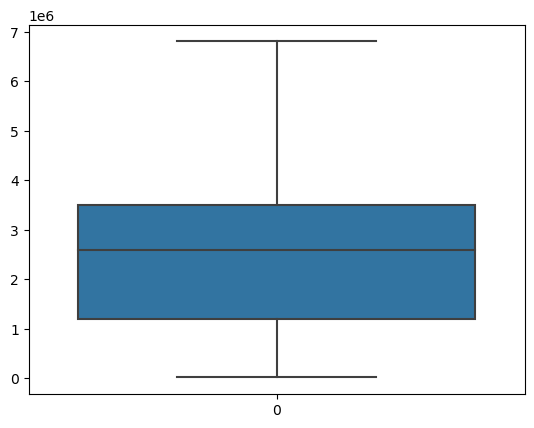

In [93]:
sns.boxplot(df.rent_per_annum)

In [94]:
df.head()

,housing_type,bedroom,bathroom,guest_toilet,parking_space,district,location,rent_per_annum
0,Selfcon,1,0,0,0,Oshodi-Mafoluku,Oshodi-Mafoluku,84000
1,Flat/Apartment,3,3,1,2,Lekki,Lekki,85000
2,Mini Flat,1,1,0,1,Ikorodu,Ikorodu,90000
3,Flat/Apartment,2,2,0,2,Ikoyi,Ikoyi,90000
4,Mini Flat,1,1,0,2,Ikorodu,Ikorodu,100000


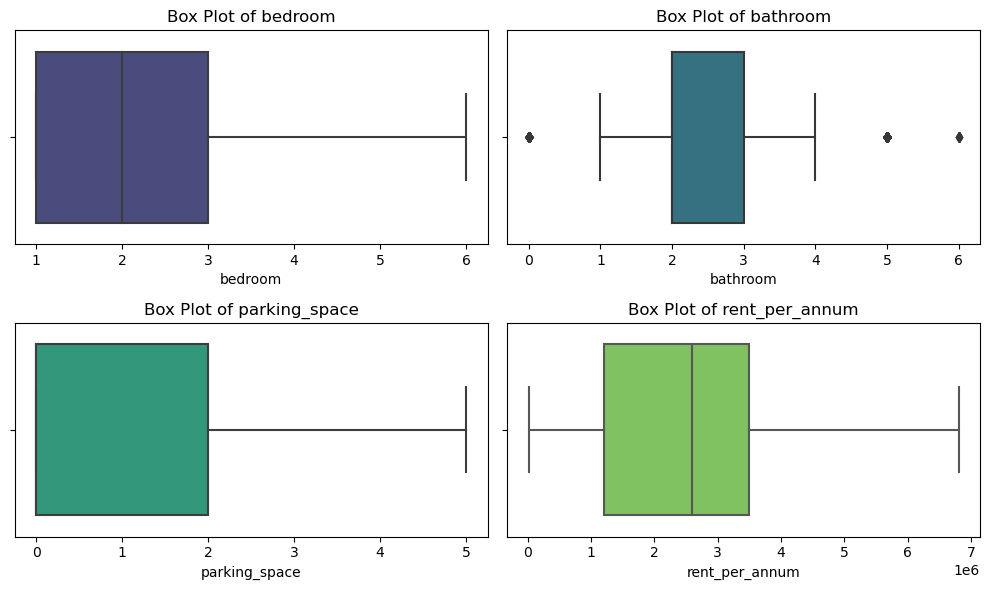

In [95]:
colors = sns.color_palette("viridis", len(numeric_columns))

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    
    sns.boxplot(x=df[column], color=colors[i-1])
    
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

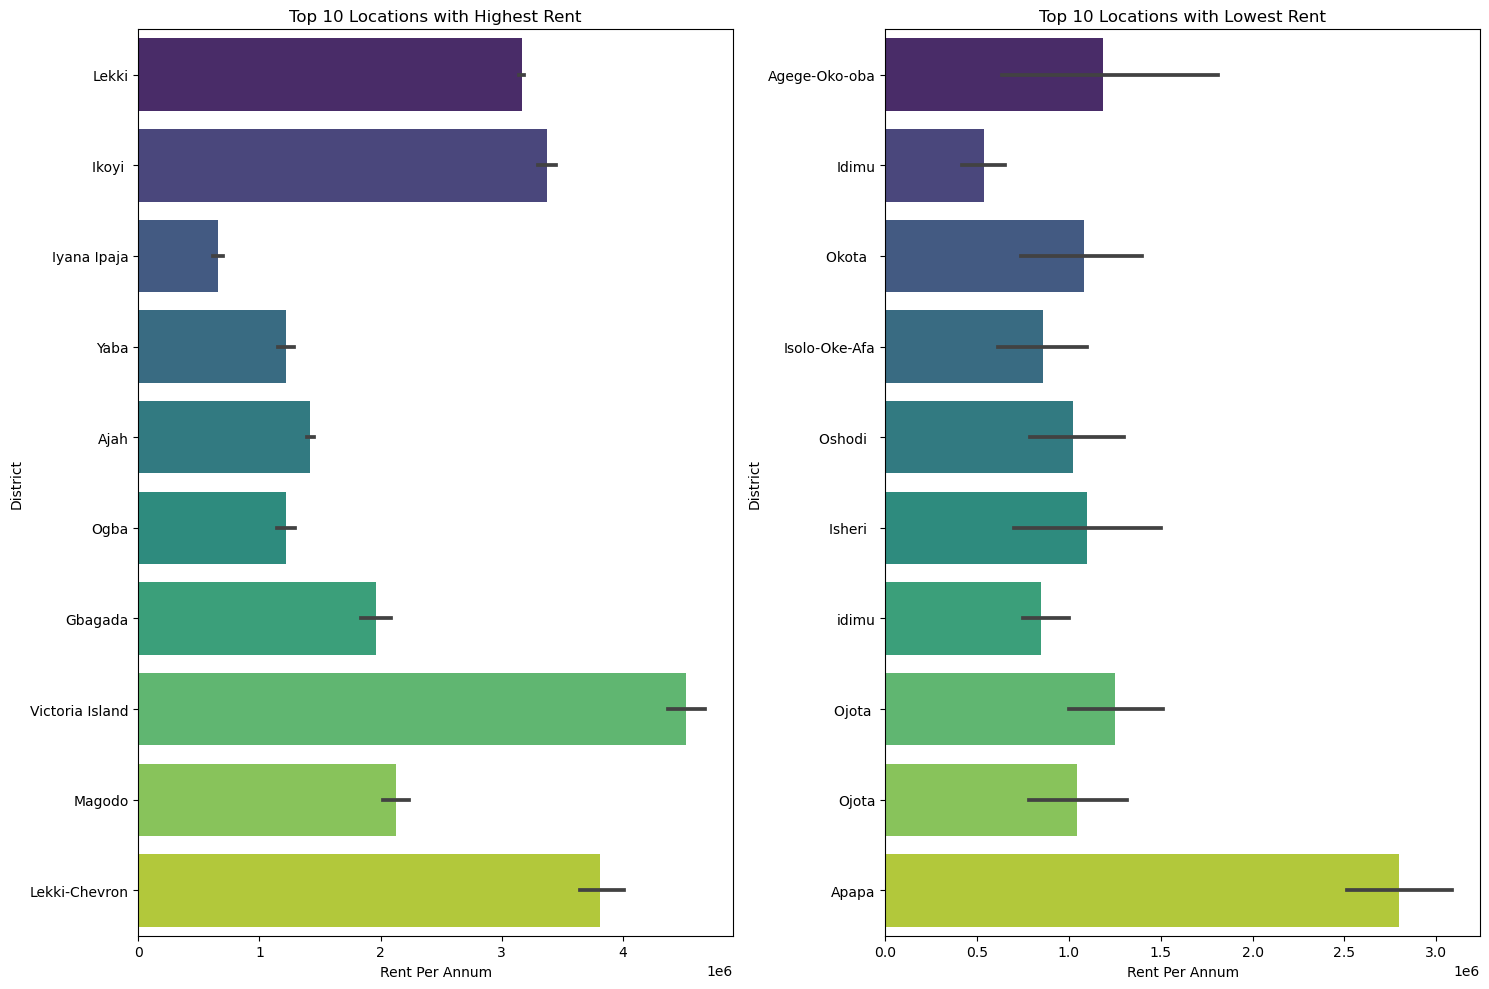

In [96]:
top_10_districts = df['district'].value_counts().head(10).index
bottom_10_districts = df['district'].value_counts().tail(10).index

df_top = df[df['district'].isin(top_10_districts)]
df_bottom = df[df['district'].isin(bottom_10_districts)]

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='rent_per_annum', y='district', data=df_top, palette='viridis')
plt.xlabel('Rent Per Annum')
plt.ylabel('District')
plt.title('Top 10 Locations with Highest Rent')

plt.subplot(1, 2, 2)
sns.barplot(x='rent_per_annum', y='district', data=df_bottom, palette='viridis')
plt.xlabel('Rent Per Annum')
plt.ylabel('District')
plt.title('Top 10 Locations with Lowest Rent')

plt.tight_layout()
plt.show()


### Analyzing the housing types at the top 10 locations highest and lowest rent per annum.

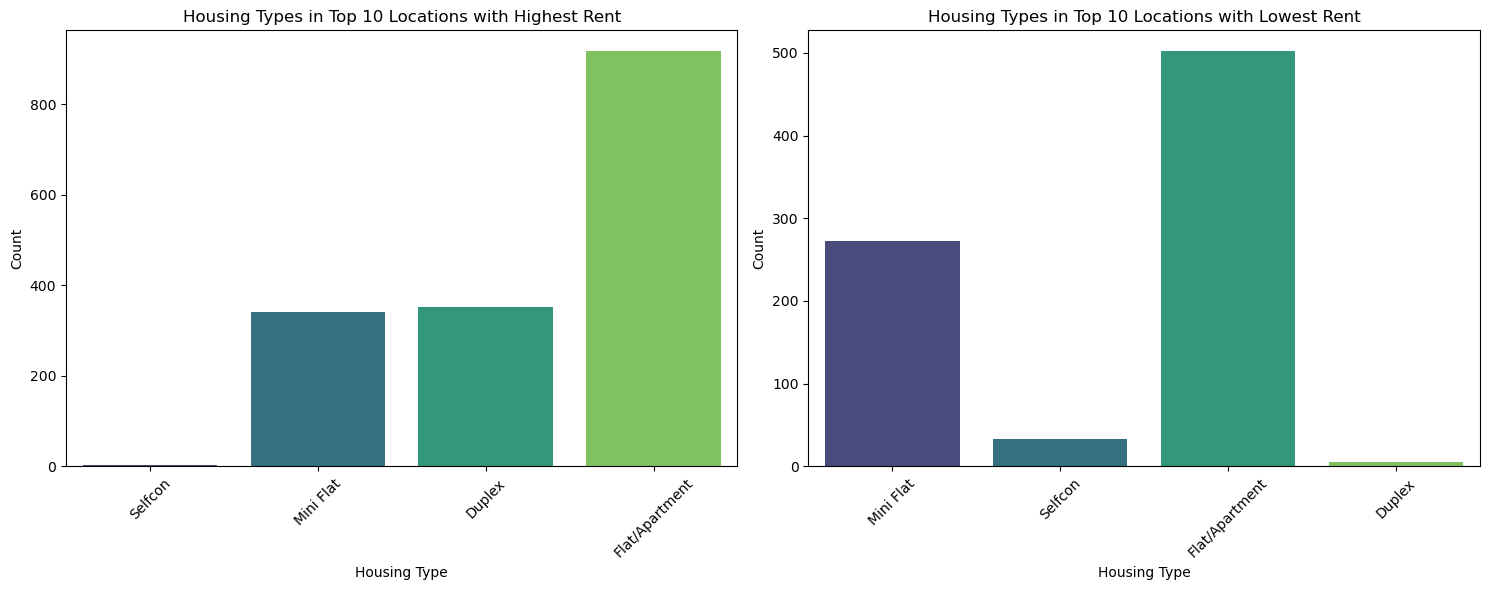

In [97]:
top_10_rent_districts = df.groupby('district')['rent_per_annum'].mean().nlargest(10).index
top_10_lowest_rent_districts = df.groupby('district')['rent_per_annum'].mean().nsmallest(10).index

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='housing_type', data=df[df['district'].isin(top_10_rent_districts)], ax=axes[0], palette='viridis')
axes[0].set_title('Housing Types in Top 10 Locations with Highest Rent')
axes[0].set_xlabel('Housing Type')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(x='housing_type', data=df[df['district'].isin(top_10_lowest_rent_districts)], ax=axes[1], palette='viridis')
axes[1].set_title('Housing Types in Top 10 Locations with Lowest Rent')
axes[1].set_xlabel('Housing Type')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

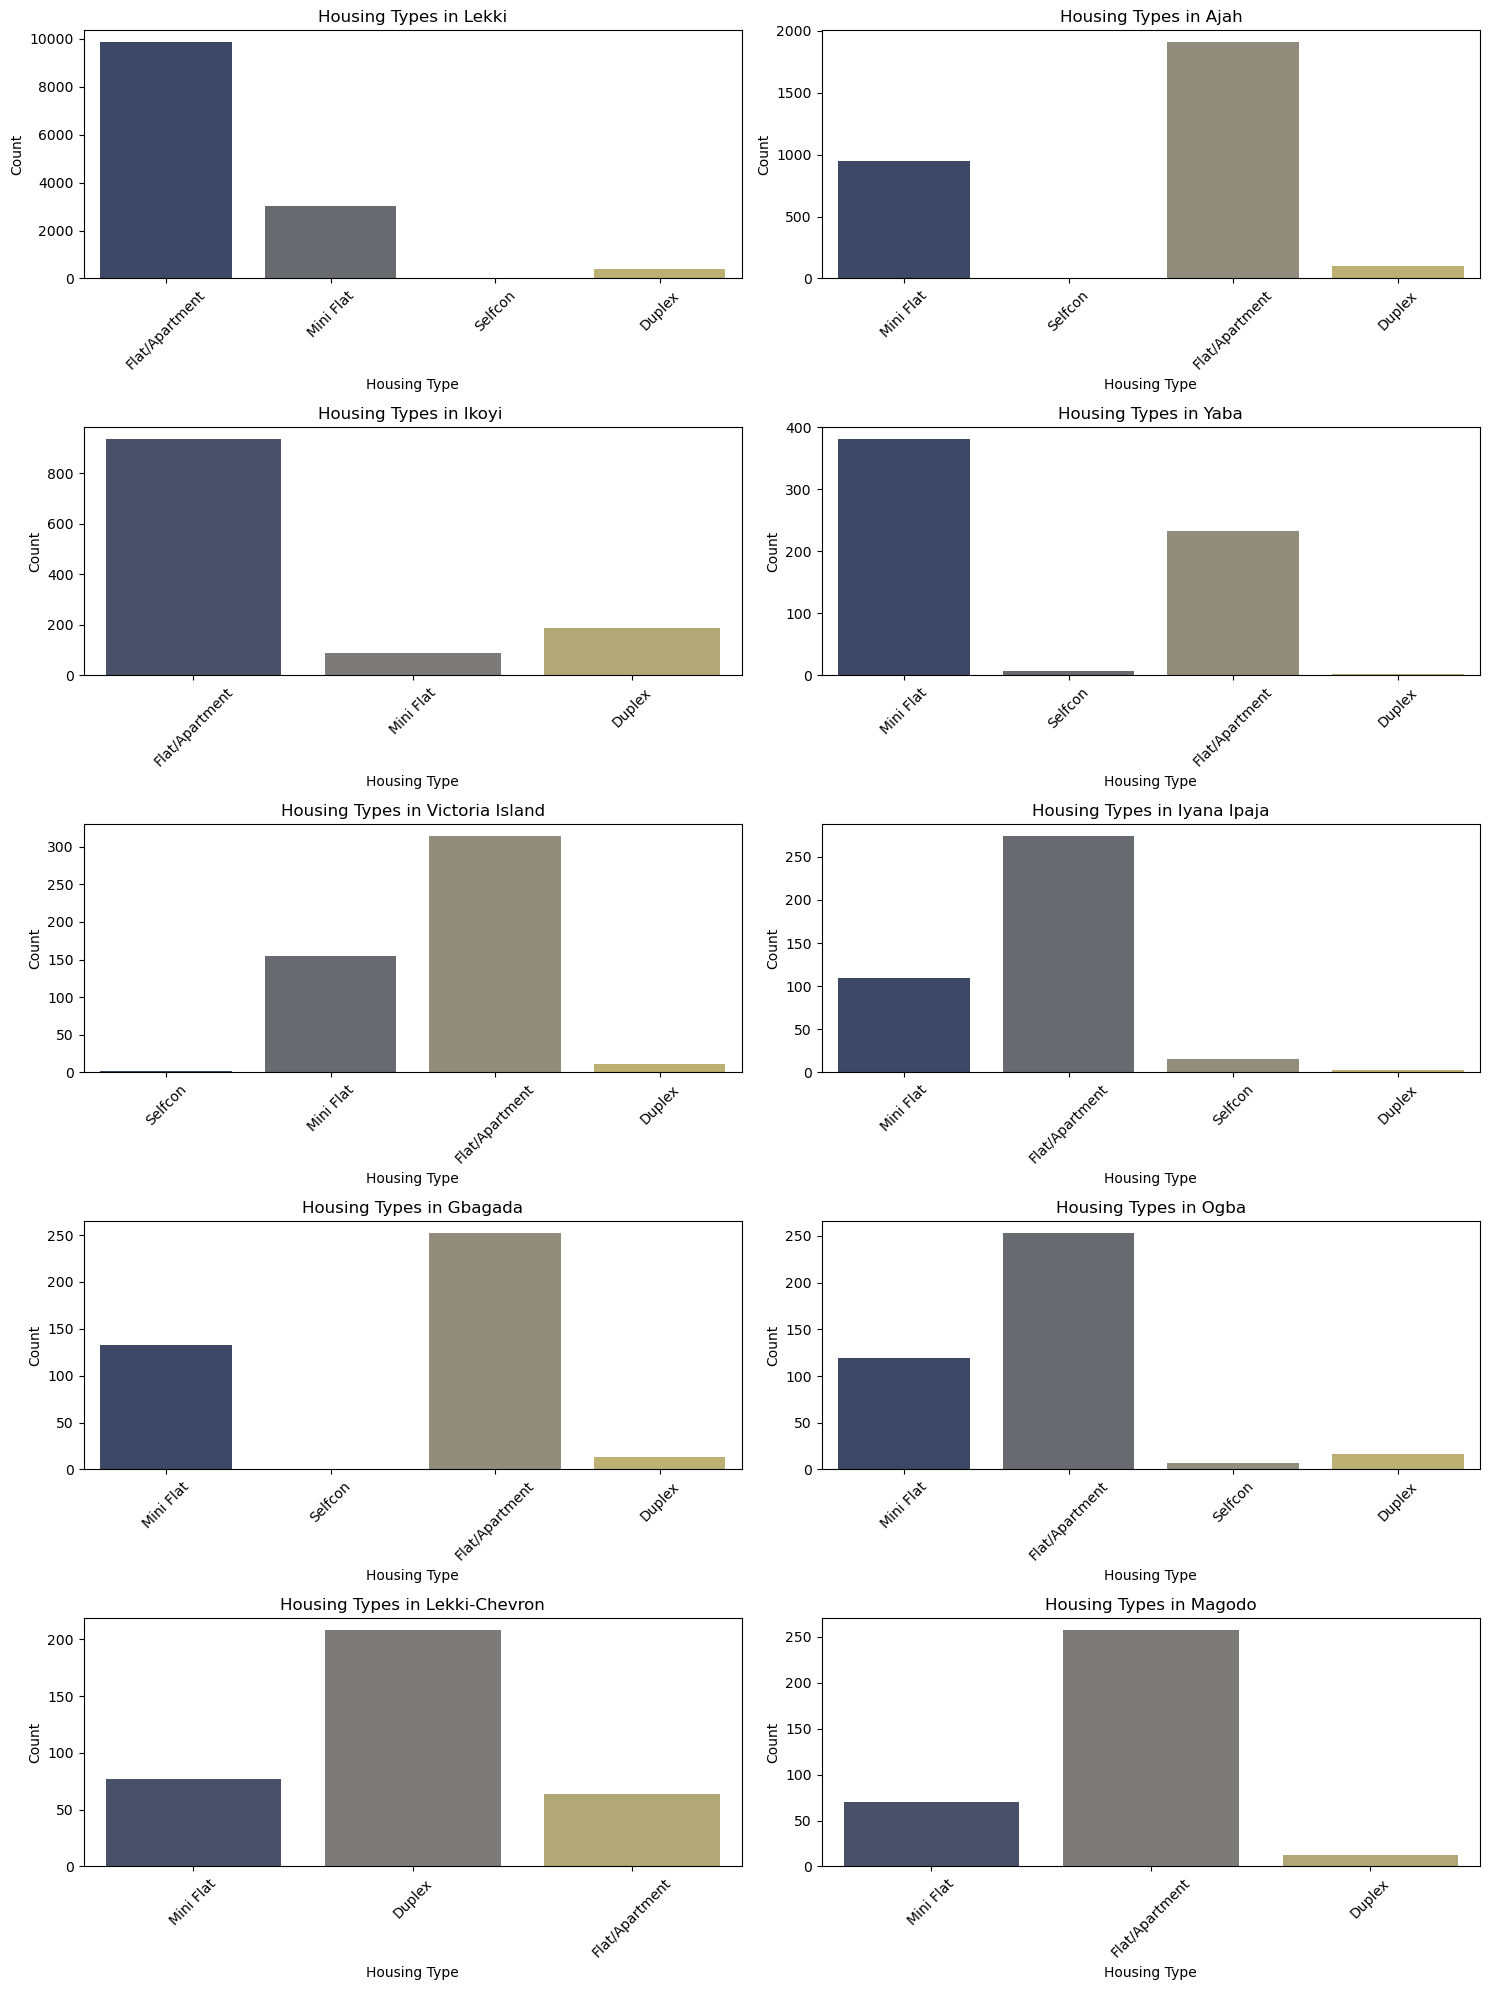

In [98]:
top_10_districts = df['district'].value_counts().head(10).index

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for i, district in enumerate(top_10_districts):
    ax = axes[i]
    sns.countplot(x='housing_type', data=df[df['district'] == district], ax=ax, palette='cividis')
    ax.set_title(f'Housing Types in {district}')
    ax.set_xlabel('Housing Type')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i in range(len(top_10_districts), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Although the chart shows flats as the most common housing type, there is an interesting trend in areas with high rent. Self-contained apartments (selfcons) are almost nonexistent in these locations, in contrast to areas with lower rent, where they are relatively scarce compared to mini flats. Self-contained apartments are typically associated with individuals or families with lower incomes. This pattern is influenced by factors such as the preferences of higher-income renters for larger spaces and amenities, income levels affecting housing choices, and evolving housing market dynamics.

The scarcity of duplexes in neighborhoods like Victoria Island, Gbagada, Ogba, Iyana Ipaja, Yaba, and Magodo, despite their classification among high-rent locations, can be attributed to a combination of unique factors. Each of these areas presents distinct characteristics that influence their housing landscape. Iyana Ipaja primarily functions as a central market, transportation, and business hub, prioritizing commercial activities over residential properties. Ogba's strategic location near Ikeja, a major business and administrative center, results in a heightened demand for office spaces and commercial real estate, often overshadowing residential development like duplexes. Yaba, home to the University of Lagos (Unilag) and a substantial student population, caters to budget-conscious students who prefer smaller housing units like self-contained apartments. Moreover, the presence of more young professionals in these areas, who may not be able to afford duplex rentals, further drives the demand for apartments and mini flats. In summary, the higher demand for apartments and smaller units in proximity to commercial and business hubs, coupled with a young professional demographic, shapes the prevailing housing landscape in these high-rent areas, making duplexes as rentals less common.

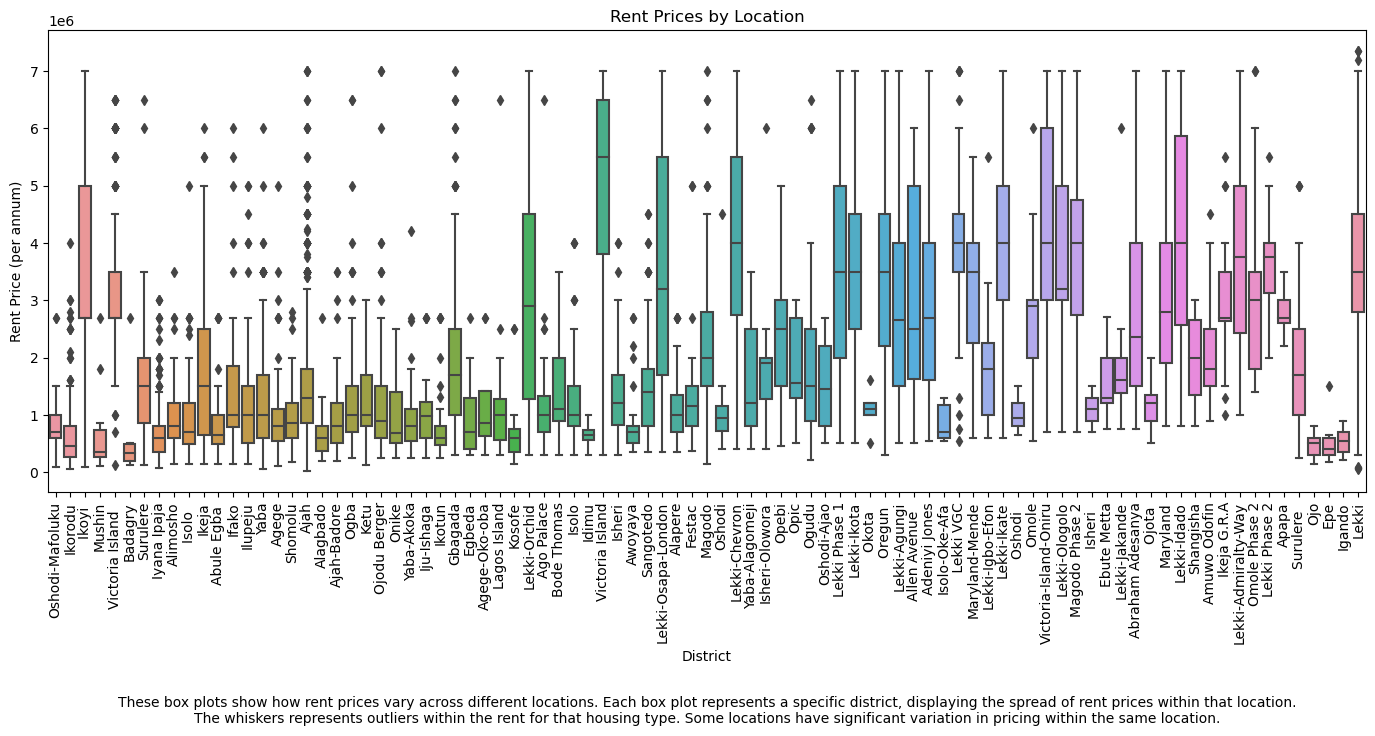

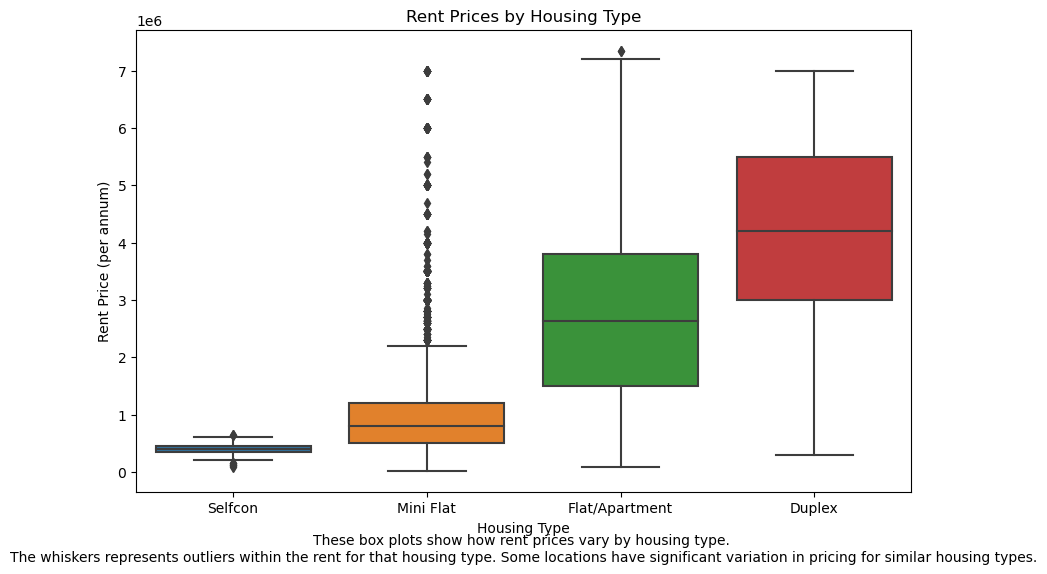

Summary Statistics for Rent Prices:
count    1.756600e+04
mean     2.433162e+06
std      1.807253e+06
min      2.000000e+04
25%      9.000000e+05
50%      2.000000e+06
75%      3.500000e+06
max      7.350000e+06
Name: rent_per_annum, dtype: float64

Mode of Rent Prices:
0    2696032
Name: rent_per_annum, dtype: int64

Summary statistics provide insights into the central tendency and spread of rent prices. Mean: Average rent price, Median: Middle value, Std: Standard deviation, Min: Minimum rent price, Max: Maximum rent price.


In [25]:
rent_stats = df['rent_per_annum'].describe()

rent_mode = df['rent_per_annum'].mode()

district_boxplot_explanation = (
    "These box plots show how rent prices vary across different locations. "
    "Each box plot represents a specific district, displaying the spread of rent prices within that location.\n"
    "The whiskers represents outliers within the rent for that housing type. Some locations have significant variation in pricing within the same location."
)

plt.figure(figsize=(17, 6))
sns.boxplot(data=df, x='district', y='rent_per_annum')
plt.title('Rent Prices by Location')
plt.xlabel('District')
plt.ylabel('Rent Price (per annum)')
plt.xticks(rotation=90)
plt.text(0.5, -0.50, district_boxplot_explanation, transform=plt.gca().transAxes, fontsize=10, ha='center')
plt.show()

housing_type_boxplot_explanation = (
    "These box plots show how rent prices vary by housing type. \n"
    "The whiskers represents outliers within the rent for that housing type. Some locations have significant variation in pricing for similar housing types."
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='housing_type', y='rent_per_annum')
plt.title('Rent Prices by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Rent Price (per annum)')
plt.xticks()
plt.text(0.5, -0.15, housing_type_boxplot_explanation, transform=plt.gca().transAxes, fontsize=10, ha='center')
plt.show()

summary_statistics_explanation = (
    "Summary statistics provide insights into the central tendency and spread of rent prices. "
    "Mean: Average rent price, Median: Middle value, Std: Standard deviation, "
    "Min: Minimum rent price, Max: Maximum rent price."
)

print("Summary Statistics for Rent Prices:")
print(rent_stats)
print("\nMode of Rent Prices:")
print(rent_mode)
print("\n" + summary_statistics_explanation)


/Users/peaceedogun/anaconda3/envs/EDA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


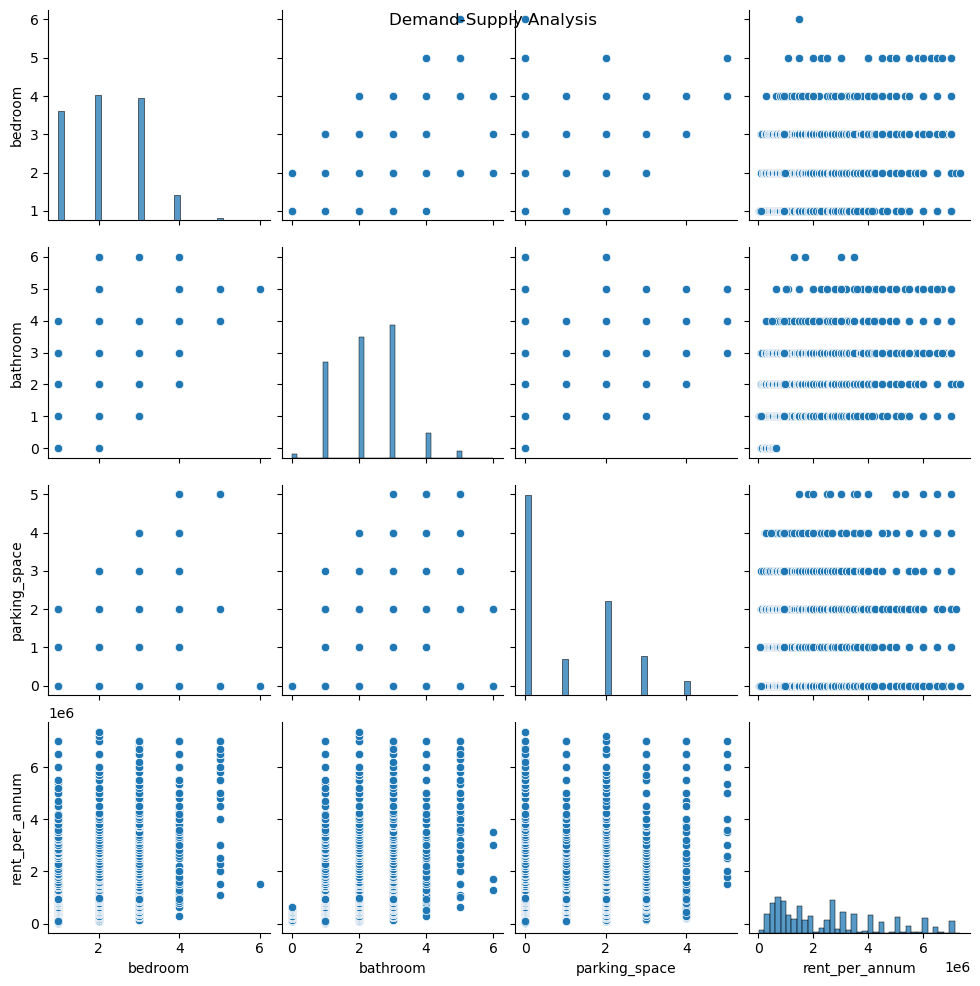

In [320]:
sns.pairplot(df[['bedroom', 'bathroom', 'parking_space', 'rent_per_annum']])
plt.suptitle('Demand-Supply Analysis')
plt.show()

The pairplot analysis focuses on the relationship between housing attributes and rent prices. It highlights that two-bedroom, two-bathroom properties without dedicated parking are highly sought after, indicating a preference for compact living spaces like flats or apartments. This category of renters may rely on public transportation or nearby amenities, minimizing the need for parking. Interestingly, properties with more rooms, like duplexes, tend to offer ample parking spaces, aligning with Nigerian housing norms suited for larger families. This analysis underscores the adaptability of housing options, catering to various preferences, from compact and budget-friendly units to spacious, family-oriented homes.